# IPL 2023 Analysis

## Importing libraries

In [183]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

## Importing the data

In [184]:
dmatch = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Hero Vired ABAD\\IPL2023_Matches.csv",encoding='latin1')

In [185]:
dscore = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Hero Vired ABAD\IPL2023_Match_Scoreboard.csv")

## Data cleaning

In [186]:
dscore.isnull().sum()

match_no             0
Home_team_run        0
Home_team_wickets    0
Home_team_over       0
Away_team_run        0
Away_team_wickets    0
Away_team_over       0
dtype: int64

In [187]:
dbat.isnull().sum()

match_no    0
Batsman     0
Position    0
team        0
Run         0
Ball        0
4s          0
6s          0
out_by      0
dtype: int64

In [188]:
dscore.dtypes

match_no               int64
Home_team_run          int64
Home_team_wickets      int64
Home_team_over       float64
Away_team_run          int64
Away_team_wickets      int64
Away_team_over       float64
dtype: object

In [189]:
dmatch.isnull().sum()

match_no            0
city                0
date_of_match       0
venue               0
Home_team           0
Away_team           0
toss_winner         0
winner              0
man_of_the_match    0
result              0
result_margin       0
eliminator          0
umpire1             0
umpire2             0
home_away           0
win_toss            0
Toss_decision       0
dtype: int64

In [190]:
dmatch.dtypes

match_no             int64
city                object
date_of_match       object
venue               object
Home_team           object
Away_team           object
toss_winner         object
winner              object
man_of_the_match    object
result              object
result_margin        int64
eliminator          object
umpire1             object
umpire2             object
home_away           object
win_toss            object
Toss_decision       object
dtype: object

In [191]:
dmatch['date_of_match'] = pd.to_datetime(dmatch['date_of_match'])

In [192]:
dmatch.dtypes

match_no                     int64
city                        object
date_of_match       datetime64[ns]
venue                       object
Home_team                   object
Away_team                   object
toss_winner                 object
winner                      object
man_of_the_match            object
result                      object
result_margin                int64
eliminator                  object
umpire1                     object
umpire2                     object
home_away                   object
win_toss                    object
Toss_decision               object
dtype: object

In [193]:
dmatch.head()

,match_no,city,date_of_match,venue,Home_team,Away_team,toss_winner,winner,man_of_the_match,result,result_margin,eliminator,umpire1,umpire2,home_away,win_toss,Toss_decision
0,1,Ahmedabad,2023-03-31,Narendra Modi Stadium,Gujarat Titans,Chennai Super Kings,Gujarat Titans,Gujarat Titans,Rashid Khan,Wickets,5,N,Nitin Menon,Saiyed Khalid,home,match won,Batting
1,2,Mohali,2023-04-01,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Arshdeep Singh,Runs,7,DLS,Bruce Oxenford,Yeshwant Barde,home,match lost,Bowling
2,3,Lucknow,2023-04-01,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,Lucknow Super Giants,Mark Wood,Runs,50,N,Anil Kumar Chaudhary,Nikhil Patwardhan,home,match lost,Bowling
3,4,Hyderabad,2023-04-02,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Jos Buttler,Runs,72,N,KN Anantha Padmanabhan,Rohan Pandit,away,match lost,Bowling
4,5,Bengaluru,2023-04-02,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Faf du Plessis,Wickets,8,N,Nitin Menon,Tapan Sharma,home,match won,Batting


In [194]:
dmatch.set_index("match_no",inplace=True)

In [195]:
dscore.set_index("match_no",inplace=True)

### Inner join of match and scorecard data on common column match number.

In [196]:
data = dmatch.merge(dscore,on="match_no",how="inner")

In [197]:
data.head()

,city,date_of_match,venue,Home_team,Away_team,toss_winner,winner,man_of_the_match,result,result_margin,...,umpire2,home_away,win_toss,Toss_decision,Home_team_run,Home_team_wickets,Home_team_over,Away_team_run,Away_team_wickets,Away_team_over
match_no,,,,,,,,,,,,,,,,,,,,,
1,Ahmedabad,2023-03-31,Narendra Modi Stadium,Gujarat Titans,Chennai Super Kings,Gujarat Titans,Gujarat Titans,Rashid Khan,Wickets,5,...,Saiyed Khalid,home,match won,Batting,182,5,19.2,178,7,20.0
2,Mohali,2023-04-01,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Arshdeep Singh,Runs,7,...,Yeshwant Barde,home,match lost,Bowling,191,5,20.0,146,7,16.0
3,Lucknow,2023-04-01,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,Lucknow Super Giants,Mark Wood,Runs,50,...,Nikhil Patwardhan,home,match lost,Bowling,193,6,20.0,143,9,20.0
4,Hyderabad,2023-04-02,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Jos Buttler,Runs,72,...,Rohan Pandit,away,match lost,Bowling,131,8,20.0,203,5,20.0
5,Bengaluru,2023-04-02,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Faf du Plessis,Wickets,8,...,Tapan Sharma,home,match won,Batting,172,2,16.2,171,7,20.0


## Data visualization

In [198]:
df = pd.DataFrame(data['winner'].value_counts())

figure = px.bar(df, 
                x=df["winner"],
                color = df['winner'],
                title="Number of Matches Won by teams in t20 World Cup 2022")
figure.show()

**Gujarat titans have won the most number of matches(10) followed by Lucknow, Chennai and Mumbai at 8 wins**

In [199]:
home_adv = data["home_away"].value_counts()

label = home_adv.index
counts = home_adv.values
colors = ['coralblue','red']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Does home team have an advantage?')
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()


**We can clearly see that surprisingly, 61.4% of the times Home teams have lost matches. Away team clearly had an advantage in this IPL.**

In [200]:
bat_bowl = data["result"].value_counts()

label = bat_bowl.index
counts = bat_bowl.values
colors = ['coralblue','red']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Chasing the target or defending?')
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

**Although the difference is small, more matches (51%) are won when a team is defending a total rather than chasing.**

### Performing Chi square test for toss analysis

In [201]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Toss_decision'], data['win_toss'])

chi2, p,a,b = chi2_contingency(contingency_table)

alpha = 0.05

if p < alpha:
    conclusion = "Reject H0: Toss decision significantly affects match outcomes."
else:
    conclusion = "Fail to reject H0: No significant impact of toss decision on match outcomes."

print(f"Chi-Squared Test Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
print(conclusion)

Chi-Squared Test Statistic: 9.50
P-Value: 0.0020
Reject H0: Toss decision significantly affects match outcomes.


**Null hypothesis is rejected as p value is less than 0.05 (alpha). We conclude that Toss decision significantly affects the toss outcomes**

In [202]:
toss = data["win_toss"].value_counts()
label = toss.index
counts = toss.values
colors = ['coralblue','red']

fig = go.Figure(data = [go.Pie(labels = label, values = counts)])
fig.update_layout(title_text = 'Does toss decide the game?')
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'percent', textfont_size = 30,
                  marker=dict(colors = colors, line = dict(color = 'black', width = 3)))
fig.show()


**54% of the times teams that won the toss have lost their respective matches. Winning a toss was unlucky majority of the time.**

### Man of the match awards

In [203]:
motm = pd.DataFrame(data['man_of_the_match'].value_counts())
motm.rename(columns = {'man_of_the_match' : 'no_of_awards'},inplace = True)
motm.head()

,no_of_awards
Yashasvi Jaiswal,4
Marcus Stoinis,3
Shubman Gill,3
Ravindra Jadeja,3
Rinku Singh,2


In [204]:
motm.reset_index(inplace = True)

In [205]:
motm10 = motm.nlargest(10,['no_of_awards'])
figure = px.bar(motm10, 
                x = motm10["index"],
                y = motm10['no_of_awards'],
                color = motm10['no_of_awards'],
                labels = {'index':'Players','no_of_awards':'No of man of the match awards'},
                title = "Maximum number of Man of the Match awards")
figure.show()

**Yashasvi Jaiswal(Rajasthan Royals) have won the most number of man of the match awards(4) followed by Marcus, Shubman and Jadeja with 3 each** 

## Importing batsman data

In [206]:
dbat = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Hero Vired ABAD\\bat.csv",encoding='latin1')
dbat

,match_no,Batsman,Position,team,Run,Ball,4s,6s,out_by,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,Devon Conway,Opener,Chennai Super Kings,1,6,0,0,Mohammed Shami,NaN,Delhi Capitals,NaN,NaN,NaN,NaN,NaN
1,1,Ruturaj Gaikwad,Opener,Chennai Super Kings,92,50,4,9,Alzarri Joseph,NaN,Abishek Porel,Wicket Keeper,NaN,NaN,NaN,NaN
2,1,Moeen Ali,Middle order/All rounder,Chennai Super Kings,23,17,4,1,Rashid Khan,NaN,Aman Hakim Khan,Low order,NaN,NaN,NaN,NaN
3,1,Ben Stokes,Middle order/All rounder,Chennai Super Kings,7,6,1,0,Rashid Khan,NaN,Axar Patel,Middle order/All rounder,NaN,NaN,NaN,NaN
4,1,Ambati Rayudu,Middle order,Chennai Super Kings,12,12,0,1,Joshua Little,NaN,Chetan Sakariya,Low order,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,69,Heinrich Klaasen,Middle order,Sunrisers Hyderabad,18,13,2,0,Akash Madhwal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,69,Glenn Phillips,Middle order,Sunrisers Hyderabad,1,4,0,0,Chris Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,69,Aiden Markram,Middle order,Sunrisers Hyderabad,13,7,0,1,Not Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,69,Harry Brook,Middle order,Sunrisers Hyderabad,0,1,0,0,Akash Madhwal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping columns which are not necessary for the analysis

In [207]:
dbat.drop(columns = {'Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'},inplace=True)

In [208]:
dbat.isnull().sum()

match_no    0
Batsman     0
Position    0
team        0
Run         0
Ball        0
4s          0
6s          0
out_by      0
dtype: int64

In [209]:
dbat.dtypes

match_no     int64
Batsman     object
Position    object
team        object
Run          int64
Ball         int64
4s           int64
6s           int64
out_by      object
dtype: object

### Highest Indviduals scores by batsman

In [210]:
dbat.nlargest(10,'Run')

,match_no,Batsman,Position,team,Run,Ball,4s,6s,out_by
847,42,Yashasvi Jaiswal,Opener,Rajasthan Royals,124,62,16,8,Arshad Khan
314,70,Shubman Gill,Opener,Gujarat Titans,104,52,5,8,Not Out
357,22,Venkatesh Iyer,Top order,Kolkata Knight Riders,104,51,6,9,Riley Meredith
1104,65,Heinrich Klaasen,Middle order,Sunrisers Hyderabad,104,51,8,6,Harshal Patel
646,57,Suryakumar Yadav,Middle order,Mumbai Indians,103,49,11,6,Not Out
759,59,Prabhsimran Singh,Top order,Punjab Kings,103,65,10,6,Mukesh Kumar
303,62,Shubman Gill,Opener,Gujarat Titans,101,58,13,1,Bhuvneshwar Kumar
992,70,Virat Kohli,Opener,Royal Challengers Bangalore,101,61,13,1,Not Out
660,69,Cameron Green,Top order/All rounder,Mumbai Indians,100,47,8,8,Not Out
988,65,Virat Kohli,Opener,Royal Challengers Bangalore,100,63,12,4,Bhuvneshwar Kumar


**Yashaswi Jaiswal (Rajasthan Royals) has the highest individual score of 124 of 62 balls followed by Shubman Gill, Venkatesh Iyer and Heinrich Klaasen with 104 each.**

### Most runs in IPL 2023, Orange Cup

In [211]:
player_stats = dbat.groupby(['Batsman'])[['Run','Ball','4s','6s']].sum()
pd.set_option('display.max_rows',176)
player_stats.reset_index(inplace = True)

most_runs = player_stats.sort_values(by = 'Run',ascending = False)
most_runs = most_runs.nlargest(20,'Run')
figure = px.bar(most_runs, 
                x = most_runs["Batsman"],
                y = most_runs['Run'],
                title = "Most runs in IPL 2023)",
                )
figure.show()

**Faf du plesis (Royal Challengers Bangalore) scored 730 runs making him the orange cap holder in IPL 2023 followed by Shubman Gill (Gujarat Titans) with 680 runs.** 

### Highest strike rate in IPL 2023 (Min. 30 balls faced)

In [212]:
player_stats['strike_rate'] = (player_stats['Run']/player_stats['Ball'])*100
high_strike = player_stats[player_stats['Ball']>30].sort_values(by = 'strike_rate',ascending = False)
high_strike = high_strike.nlargest(15,'strike_rate')
high_strike

high_strike['strike_rate'] = round(high_strike['strike_rate'],2)
fig = px.line(high_strike, 
              x = high_strike['Batsman'], 
              y = high_strike['strike_rate'], markers = True,
              title = "Highest strike rate in IPL 2023 (Min. 30 balls faced)")
fig.show()


**Rashid Khan has the highest strike rate at 237.5 followed by MS Dhoni only at 190.74.**

### Comparing stadiums to check which one is best to bat first or bowl first

In [213]:
stadium = pd.DataFrame(data.groupby(['venue'])['result'].value_counts())
stadium.rename(columns = {'result':'count'},inplace=True)
stadium.reset_index(inplace = True)

stadium.iloc[0,0] = 'Arun Jaitley Stadium'

In [214]:
figure = px.bar(stadium, 
                x=stadium["venue"],
                y=stadium["count"],
                color = stadium['result'],
                title="Best stadiums to defend or chase?"
                )
figure.show()

**To bowl first - MA Chidambaram and Wankhede Stadiums have the most of numbers of win batting second/bowling first**

**To bat first - Chinnaswamy, Narendra Modi and Rajiv Gandhi Stadiums have the most number of wins batting first/ bowling second.**

### Number of boundaries hit by teams 

In [215]:
most_boundaries = dbat.groupby('team')[['6s','4s']].sum().reset_index()

In [216]:
fig = go.Figure()

label = most_boundaries['team']
counts = most_boundaries['6s']
  
fig = go.Figure(data = [go.Pie(labels = label, values = counts)])
fig.update_layout(title_text = 'Number of sixes hit by teams')
fig.update_traces(hoverinfo = 'percent+label', textinfo = 'value', textfont_size = 18,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))
fig.show()


In [217]:
fig = go.Figure()

label = most_boundaries['team']
counts = most_boundaries['4s']

fig = go.Figure(data = [go.Pie(labels = label, values = counts)])
fig.update_layout(title_text = 'Number of fours hit by teams')
fig.update_traces(hoverinfo = 'percent+label', textinfo = 'value', textfont_size = 18,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))
fig.show()


**Mumbai Indians and Kolkate Knight Riders scored the most numbers of 6s while Mumbai Indians scored the most onumber of fours.**

**Delhi Capitals scored the least numbers of 6s while Chennai Super Kings scored the least number of fours.**

### Density plot of Home and Away team scores

<AxesSubplot:xlabel='Home_team_run', ylabel='Density'>

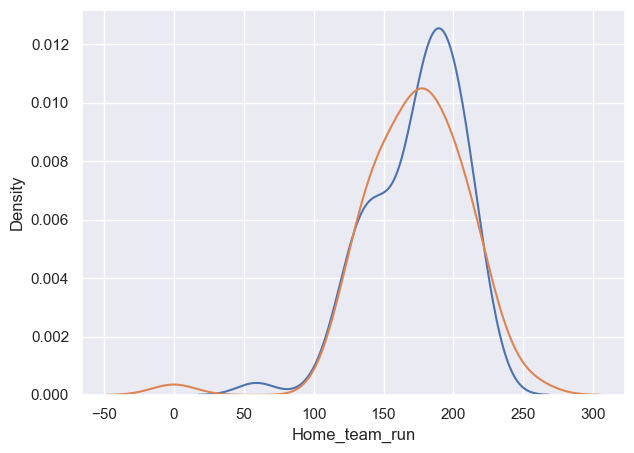

In [218]:
sns.kdeplot(data['Home_team_run'])
sns.kdeplot(data['Away_team_run'])

In [219]:
data[['Home_team_run','Away_team_run']].median()

Home_team_run    180.5
Away_team_run    174.5
dtype: float64

**Median of Home team runs is 180 runs when compared to 174 runs of away team. This also justifies the fact that teams defending a total wins majority of the time. We are not using mean as it can be influenced by the outlier values.**

### Batsman v/s Bowler Stats

In [220]:
wicket_bat = pd.DataFrame(dbat.groupby(['Batsman'])['out_by'].value_counts())

In [221]:
wicket_bat.rename(columns = {'out_by':'wickets'},inplace=True)

In [222]:
wicket_bat.reset_index(inplace=True)

In [223]:
wicket_bat = wicket_bat.sort_values(by = "wickets",ascending = False)

wicket_bat[wicket_bat['out_by']!='Not Out'].head(10)

,Batsman,out_by,wickets
398,Kyle Mayers,Moeen Ali,2
860,Venkatesh Iyer,Marco Jansen,2
140,Cameron Green,Nathan Ellis,2
414,Liam Livingstone,Ishant Sharma,2
399,Kyle Mayers,Mohammed Siraj,2
386,Krunal Pandya,Sunil Narine,2
274,Harpreet Brar,Run Out,2
840,Tim David,Tushar Deshpande,2
827,Suyash Prabhudessai,Run Out,2
763,Shikhar Dhawan,Ishant Sharma,2


**Maximum number of times a particular bowler has taken the wicket of a particular bowler.**

**Marco Jansen has taken Venkatesh Iyer's wicket twice, likewise other bowlers have also taken wickets of Batsman twice.**


### Importing Bowling data

In [224]:
dbowl = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Hero Vired ABAD\\IPL2023_Bowler.csv",encoding='latin1')
dbowl.head()

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3


### Best bowling figures in IPL 2023

In [225]:
best_bowling = dbowl.sort_values(by = ["wicket","ECO"],ascending = [False,True]).head(5)
best_bowling

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
27,3,Mark Wood,Lucknow Super Giants,4.0,14,5,1,3.5
744,62,Bhuvneshwar Kumar,Sunrisers Hyderabad,4.0,30,5,0,7.5
529,44,Mohammed Shami,Gujarat Titans,4.0,11,4,0,2.8
161,14,Mayank Markande,Sunrisers Hyderabad,4.0,15,4,0,3.8
44,4,Yuzvendra Chahal,Rajasthan Royals,4.0,17,4,0,4.3


### Most wickets in IPL 2023, Purple cap

In [249]:
most_wickets = pd.DataFrame(dbowl.groupby('Bowler').agg({'wicket':'sum','over':'sum','run':'sum','ECO':'mean'}))
most_wickets.reset_index(inplace = True)
most_wickets.sort_values(by='wicket',ascending = False,inplace = True)

px.bar(most_wickets.head(20), 
       x = 'Bowler', 
       y = 'wicket',color = 'wicket',
       title = 'Most wickets in IPL 2023')

**Rashid Khan (Gujarat Titans) has taken the most number of wickets(25) followed by Mohammed Shami and Yuzvendra Chahal at 24 and 21 respectively**

### Best economy rate in IPL 2023 (Min. 20 overs bowled)

In [228]:
best_eco = pd.DataFrame(dbowl.groupby('Bowler').agg({'over' : 'sum', 'ECO' : 'mean'}))
best_eco.reset_index(inplace = True)
best_eco = best_eco[best_eco['over'] > 20]
best_eco.sort_values(by = 'ECO',ascending = True,inplace = True)
best_eco.head(10)

,Bowler,over,ECO
17,Axar Patel,47.0,7.246154
34,Hardik Pandya,22.0,7.544444
57,Kuldeep Yadav,49.0,7.557143
88,Naveen-ul-Haq,24.0,7.566667
102,Ravichandran Ashwin,49.0,7.576923
70,Matheesha Pathirana,38.2,7.600000
100,Rashid Khan,56.0,7.692857
79,Mohammed Siraj,50.0,7.721429
35,Harpreet Brar,27.1,7.790909
93,Piyush Chawla,54.0,7.807143


In [229]:
fig = go.Figure()
fig = px.line(best_eco.head(20),
              'Bowler',
              'ECO', 
              title ='Best economy rate (Min. 20 overs bowled)')
fig.show()

**Axar patel has the least economy rate with 7.24 having bowled 47 overs, followed by Hardik Pandya with 7.54.**

### Most expensive bowling figures in IPL 2023

In [230]:
dbowl.sort_values(by = 'run',ascending = False).head(5)

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
149,13,Yash Dayal,Gujarat Titans,4.0,69,0,0,17.3
553,46,Arshdeep Singh,Punjab Kings,3.5,66,1,0,18.9
281,24,Vijaykumar Vyshak,Royal Challengers Bangalore,4.0,62,1,0,15.5
548,46,Jofra Archer,Mumbai Indians,4.0,56,0,1,14.0
66,6,Deepak Chahar,Chennai Super Kings,4.0,55,0,0,13.8


**Yash Dayal (Gujarat titans) has the worst bowling figures going for 69 runs in 4 overs with no wickets taken.**

In [231]:
dbat

,match_no,Batsman,Position,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Opener,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Opener,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Middle order/All rounder,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Middle order/All rounder,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Middle order,Chennai Super Kings,12,12,0,1,Joshua Little
...,...,...,...,...,...,...,...,...,...
1109,69,Heinrich Klaasen,Middle order,Sunrisers Hyderabad,18,13,2,0,Akash Madhwal
1110,69,Glenn Phillips,Middle order,Sunrisers Hyderabad,1,4,0,0,Chris Jordan
1111,69,Aiden Markram,Middle order,Sunrisers Hyderabad,13,7,0,1,Not Out
1112,69,Harry Brook,Middle order,Sunrisers Hyderabad,0,1,0,0,Akash Madhwal


### Finding the best 11 of IPL 2023

#### Grouping batsman data according to their Positions at which they come to bat

In [232]:
best_11 = dbat.groupby(['Position','Batsman'])[['Run','4s','6s']].sum()
best_11.reset_index(inplace = True)

best_11[best_11['Position'] == 'Opener'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
128,Opener,Faf du Plessis,730,60,36
143,Opener,Shubman Gill,680,67,22
145,Opener,Virat Kohli,639,65,16
148,Opener,Yashasvi Jaiswal,625,83,26
141,Opener,Ruturaj Gaikwad,581,48,29


In [233]:
best_11[best_11['Position'] == 'Top order'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
161,Top order,Venkatesh Iyer,404,32,21
157,Top order,Prabhsimran Singh,358,38,19
150,Top order,Ajinkya Rahane,282,22,13
158,Top order,Rahul Tripathi,274,29,10
152,Top order,Devdutt Padikkal,261,31,6


In [234]:
best_11[best_11['Position'] == 'Top order/All rounder'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
163,Top order/All rounder,Cameron Green,381,32,19
164,Top order/All rounder,Deepak Hooda,69,3,1
165,Top order/All rounder,Joe Root,10,1,0


In [235]:
best_11[best_11['Position'] == 'Middle order'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
97,Middle order,Suryakumar Yadav,511,56,24
89,Middle order,Rinku Singh,474,31,29
82,Middle order,Heinrich Klaasen,448,32,25
86,Middle order,Nitish Rana,413,39,20
96,Middle order,Shimron Hetmyer,299,12,23


In [236]:
best_11[best_11['Position'] == 'Middle order/All rounder'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
108,Middle order/All rounder,Glenn Maxwell,400,29,31
122,Middle order/All rounder,Shivam Dube,385,12,33
113,Middle order/All rounder,Marcus Stoinis,368,23,26
109,Middle order/All rounder,Hardik Pandya,289,23,11
105,Middle order/All rounder,Axar Patel,283,21,12


In [237]:
best_11[best_11['Position'] == 'Wicket Keeper'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
168,Wicket Keeper,Ishan Kishan,439,51,18
175,Wicket Keeper,Sanju Samson,362,25,24
173,Wicket Keeper,Nicholas Pooran,358,26,26
169,Wicket Keeper,Jitesh Sharma,280,16,21
174,Wicket Keeper,Philip Salt,218,24,10


In [238]:
best_11[best_11['Position'] == 'Low order/All rounder'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
66,Low order/All rounder,Ravichandran Ashwin,67,5,3
67,Low order/All rounder,Wayne Parnell,2,0,0


In [239]:
best_11[best_11['Position'] == 'Low order'].sort_values(by = 'Run',ascending = False).head(5)

,Position,Batsman,Run,4s,6s
52,Low order,Shahrukh Khan,156,13,9
53,Low order,Shardul Thakur,113,13,4
4,Low order,Aman Hakim Khan,110,7,6
47,Low order,Rashid Khan,95,4,11
30,Low order,Lalit Yadav,66,8,0


In [240]:
most_wickets.head(5)

,Bowler,wicket,run,ECO
100,Rashid Khan,25,430,7.692857
78,Mohammed Shami,24,433,7.871429
136,Yuzvendra Chahal,21,432,8.364286
93,Piyush Chawla,20,422,7.807143
122,Tushar Deshpande,20,465,9.142857


In [241]:
best_eco[best_eco['over'] > 40].sort_values(by = "ECO",ascending = True).head()

,Bowler,over,ECO
17,Axar Patel,47.0,7.246154
57,Kuldeep Yadav,49.0,7.557143
102,Ravichandran Ashwin,49.0,7.576923
100,Rashid Khan,56.0,7.692857
79,Mohammed Siraj,50.0,7.721429


**According to me an ideal cricket team includes -**

**2 Opening Batsmen**
**| 1 Top order Batsman**
**| 2 Middle order Batsmen**
**| Wicket Keeper**
**| 1 Middle order All rounder**
**| 2 Spinners**
**| 2 Pace Bowlers**

**Opener - Faf du Plesis and Shubman Gill have scored the most number of runs, so they'll be the openers.**

**Top order - We have Cameron Green who scored runs, took crucial wickets and scored a century. He can give 4 overs with the ball as well.**

**Middle order - At 4, we have Surkyakumar Yadav who has scored over 500 runs at an impressive strike rate of 185. At 5 we have Rinku Singh who has played really well scoring over 470 runs in this IPL.**

**Wicket Keeper - At 6, Ishan Kishan scoring more than 430 runs with the bat**

**Middle order all rounder - At 7, Glenn Maxwell has scored the most number of runs among the all rounders.**

**Spin Bowlers - We have Rashid khan and Yuzvendra Chahal who took 25 and 21 wickets respectively for spinners.**

**Pace Bowlers - We have Mohammed Shami as one of the pace bowlers with 24 wickets. Among the bowlers with best economy rates the only pace bowler in the top 5 is Mohammed Siraj so he is the other pacer in the team.**

### Finding correlation of Batsman, Bowler data

### Converting categorical variables into numeric and hence finding correlation

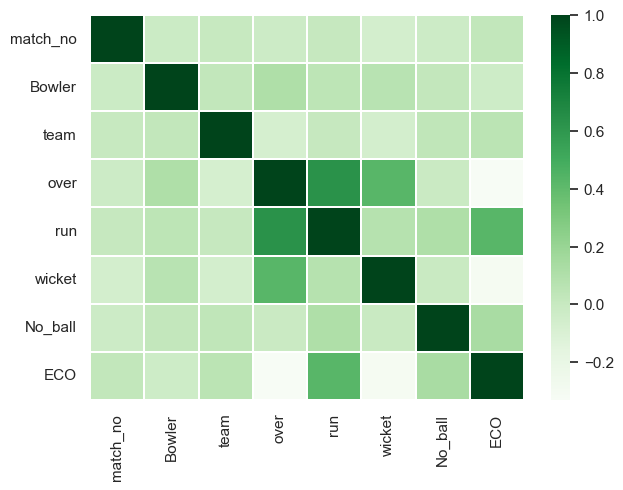

In [176]:
data_numeric = dbowl

for col in data_numeric.columns:
    if(data_numeric[col].dtype=='object'):
        data_numeric[col]=data_numeric[col].astype('category')
        data_numeric[col]=data_numeric[col].cat.codes
        
data_numeric
correlation_matrix = dbowl.corr(method='pearson')

sns.set(rc = {'figure.figsize':(7,5)})
sns.heatmap(correlation_matrix,linewidths = 0.3, cmap = 'Greens')
plt.show() 

**Runs have high correlation with number of boundaries and Balls faced which is very obvious as the more you stay on crease more runs you tend to score and more boundaries you hit**

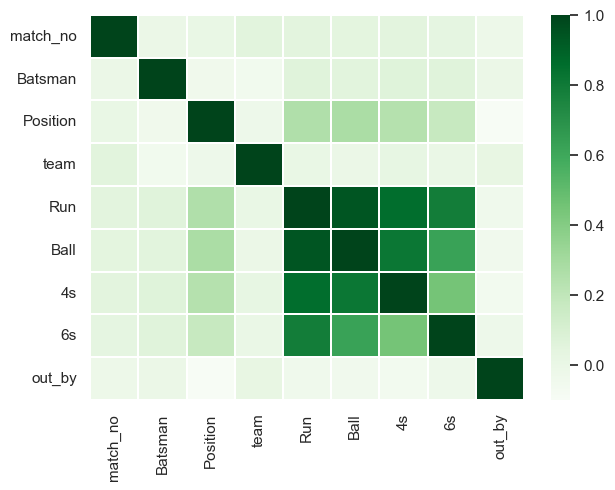

In [175]:
data_numeric = dbat

for col in data_numeric.columns:
    if(data_numeric[col].dtype=='object'):
        data_numeric[col]=data_numeric[col].astype('category')
        data_numeric[col]=data_numeric[col].cat.codes
        
data_numeric
correlation_matrix = dbat.corr(method='pearson')

sns.set(rc = {'figure.figsize':(7,5)})
sns.heatmap(correlation_matrix,linewidths = 0.3, cmap = 'Greens')
plt.show() 

**Runs given have high correlation with number of overs bowled,There's moderate positive correlation between economy rate and runs given away by the bowler, wickets and taken and number of overs bowled**

### Calculating impact scores of Batsmen and Bowlers

In [242]:
impact_scores = player_stats.copy()

max_runs = impact_scores['Run'].max()
max_balls = impact_scores['Ball'].max()
max_strike = impact_scores['strike_rate'].max()

max_runs,max_balls,max_strike

(730, 475, 433.3333333333333)

**For calculating the impact scores,
first we select the performance metrics. I have chosen the runs scored, balls faced and strike rate as the perofrmance metrics.**

**Normalize the metrics - Normalize each metric to bring them to a similar scale. Dividing it by the highest value of each metric(For example :Dividing each runs scored by max runs scored by a Batsman)**

**Assigning weights - Assign weights to each metric based on their relative importance in determining a player's impact. 4
Runs - 0.4
Balls faced = 0.3
Strike rate - 0.3**

**Calculate componet scores - For each metric, calculate a component score by multiplying the normalized value by its assigned weight and then take the sum of scores for each Batsman.**

In [243]:
impact_scores['Run'] = impact_scores['Run']/max_runs

impact_scores['Ball'] = impact_scores['Ball']/max_balls

impact_scores['strike_rate'] = impact_scores['strike_rate']/max_strike

impact_scores['Run'] = impact_scores['Run']*0.4

impact_scores['Ball'] = impact_scores['Ball']*0.3

impact_scores['strike_rate'] = impact_scores['strike_rate']*0.3

impact_scores['Score'] = impact_scores['Run']+ impact_scores['Ball'] + impact_scores['strike_rate']

impact_scores.sort_values(by='Score',ascending = False).head()

,Batsman,Run,Ball,4s,6s,strike_rate,Score
43,Faf du Plessis,0.400000,0.300000,60,36,0.106397,0.806397
148,Shubman Gill,0.372603,0.281684,67,22,0.105554,0.759841
166,Virat Kohli,0.350137,0.288632,65,16,0.096802,0.735570
174,Yashasvi Jaiswal,0.342466,0.241263,83,26,0.113270,0.696999
135,Ruturaj Gaikwad,0.318356,0.250737,48,29,0.101318,0.670411


**Faf du Plesis has the highets impact score with 0.8 followed by Shubman Gill and Virat Kohli at 0.75 and 0.73 respectively**

In [260]:
impact_scores_bowl = most_wickets.copy()

max_wicket = impact_scores_bowl['wicket'].max()
max_eco = impact_scores_bowl['ECO'].max()
max_overs = impact_scores_bowl['over'].max()

max_wicket,max_eco,max_overs

(25, 18.0, 56.0)

In [261]:
impact_scores_bowl['wicket'] = impact_scores_bowl['wicket']/max_wicket

impact_scores_bowl['ECO'] = impact_scores_bowl['ECO']/max_eco

impact_scores_bowl['over'] = impact_scores_bowl['over']/max_overs

impact_scores_bowl['wicket'] = impact_scores_bowl['wicket']*0.4

impact_scores_bowl['ECO'] = 1/(impact_scores_bowl['ECO'])*0.4

impact_scores_bowl['over'] = impact_scores_bowl['over']/max_overs*0.2


impact_scores_bowl['Score'] = impact_scores_bowl['wicket']+ impact_scores_bowl['ECO'] + impact_scores_bowl['over']

impact_scores_bowl.sort_values(by='Score',ascending = False).head()

,Bowler,wicket,over,run,ECO,Score
18,Ayush Badoni,0.000,0.000006,0,inf,inf
100,Rashid Khan,0.400,0.003571,430,0.935933,1.339505
78,Mohammed Shami,0.384,0.003508,433,0.914701,1.302208
93,Piyush Chawla,0.320,0.003444,422,0.922232,1.245676
79,Mohammed Siraj,0.304,0.003189,375,0.932470,1.239659


**Rashid Khan has the highets impact score with 1.33 followed by Mohammed Shami and Piyush Chawla at 1.30 and 1.24 respectively**